# K Nearest Neighbours (KNN)

The purpose of this notebook is to show how PCA works and how to implement it using numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

C:\Users\samue\AppData\Local\Temp\ipykernel_856\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Loading Data

We will be using the [iris dataset](https://www.kaggle.com/datasets/arshid/iris-flower-dataset/data)

In [2]:
df = pd.read_csv("../data/iris.csv")

# Split data into data we will use as our already know points (train) and points we will use to test the accuracy (test)
train = df.sample(frac=0.8)
test = df.drop(train.index)

# Split data up between features and labels
train_features = np.array(train.drop(["species"], axis=1))
train_labels = np.array(train["species"])
test_features = np.array(test.drop(["species"], axis=1))
test_labels = np.array(test["species"])

# Scaling data
train_features = (train_features - np.mean(train_features, axis=0)) / np.std(train_features, axis=0)
test_features = (test_features - np.mean(test_features, axis=0)) / np.std(test_features, axis=0)

## Prediction using KNN

The main idea behind the KNN neighbours algorithm is too find the closet data points to the data point you want to predict the label of and take the most frequent label from the neighbours as the prediction for the data point.

To find the distance between two points in our data set we will use the euclidian distance which can be denoted as $\|x_{i}-p\|$ where $x_{i}, p\in\mathbb{R}$ and $x_{i}$ denoted the feature vector of the $i$ th data point in our data set and $p$ represents the feature evctor of the data point we are trying the classify.

After we find the $k$ nearest data points to the data point we are trying to classify we look up the labels of the data points and find the most frequenctly occuing one and return it as our prediction.

In [3]:
def knn_on_sample(data: tuple[np.array, np.array], sample: np.array, k):
    data_features = data[0]
    
    # Calculating the euclidian distance to every point
    distances = np.linalg.norm(data_features - sample, axis=1)
    
    # Find the k closest points
    sorted_indices = np.argsort(distances)[:k]
    neighbours = data[1][sorted_indices]
    
    # Return the modal class of the neighbours
    labels, counts = np.unique(neighbours, return_counts=True)
    return labels[counts.argmax()]

In [4]:
def knn_on_samples(data: tuple[np.array, np.array], samples: np.array, k):
    prediction = np.array([knn_on_sample(data, features, k) for features in samples])
    return prediction

## Test the Accuracy of the model

Using our testing data we will calculate the accuracy of our model

In [5]:
predictions = knn_on_samples((train_features, train_labels), test_features, 4)

# Calculate percentage accuracy
accuracy = np.count_nonzero(predictions == test_labels) / test_labels.shape[0] * 100

print(f"Accuracy = {accuracy:.2f}%")

Accuracy = 93.33%


## Visulising classification

For use to visualize the data on a 2D graph, we apply PCA to reduce the dimenstionality of the data.

For the data points in the test data set we plot them on the graph and then color them green if they were correctly classified and red if they are not.

From the graph we can see the point in the purple region have all been classified correctly. The points which have not been label correctly are near the boundary of the blue and yellow data points. When using KNN, points are likely to be miss classified if they are near the border of two different classes.

Hello


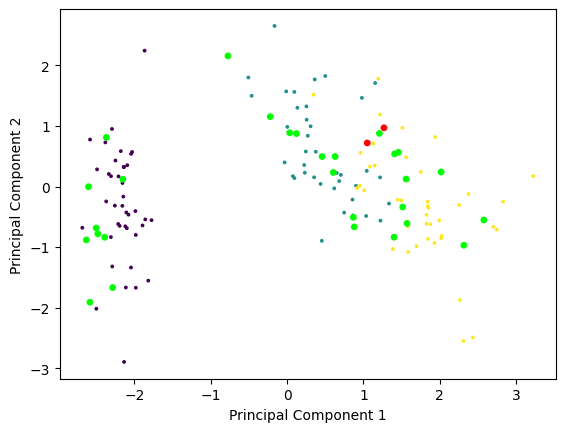

In [6]:
import sys
sys.path.append("../")
from PCA.pca import calculate_principal_components, project_onto_components

species_map = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2,
}

outcomes = np.array([species_map[x] for x in train_labels])

# Calculate principla components and then project data onto principal components
components, _ = calculate_principal_components(train_features)
train_projections = project_onto_components(train_features, components=components)
test_projections = project_onto_components(test_features, components=components)

plt.xlabel(f"Principal Component 1")
plt.ylabel(f"Principal Component 2")
plt.scatter(train_projections[:, 0], train_projections[:, 1], c=outcomes, s=3)

# Colors point based on if they were correctly classified
test_colors = np.vectorize(lambda x: "#00FF00" if x else "#FF0000")(predictions == test_labels)
plt.scatter(test_projections[:, 0], test_projections[:, 1], c=test_colors, s=15)

plt.show()